In [229]:
import numpy as np
import matplotlib.pyplot as plt
from fits_library import linear_fit
from scipy.interpolate import UnivariateSpline

In [230]:
#constants
R0 = 37
T0 = 22.1 #temperature of the room when taking data
boltzmann = 1.380649E-23 #boltzmann constant in SI units
c = 3E8 #speed of light
alpha = 4.5E-3
min_deviation = 48.363 #this is just there not used in calculcations
sensor0 = np.round(262.67+25/180, 3)

In [231]:
def tempCalculate(voltage, current):
    #Calculating temperature of the tungsten filament
    return (T0 + ((voltage/current)/R0 - 1) / alpha)

def refractiveIndexCalculate(angle):
    #equation obtained from reference
    return (np.sqrt(((2/np.sqrt(3))*np.sin(angle*(np.pi/180))+0.5)**2+0.75))

def wavelengthCalculate(angle):
    #Sellmeier Equation
    #A = 0.0107, B = 0.7
    #A calculated using scipy.optimize.curve_fit() on data from Thor Labs on F2 material dispersive prism
    return ((0.0107/(np.sqrt(((2/np.sqrt(3))*np.sin(angle*(np.pi/180))+0.5)**2+0.75)-0.7)))

def maximumIndex(array):
    #returns the index of the maximum valued element in an array
    #required to get the highest dispersed wavelength
    return np.where(array == np.max(array))

def curveFit(array1, array2, s = 5):
    #returns a fit to data without a known function
    return UnivariateSpline(array1, array2, s)

In [232]:
#Voltage = 220 V, Current = 0.423 A

T_220 = tempCalculate(220, 0.423)

#loading raw data for angles and intensity
angles_220, intensity_220 = np.loadtxt("./data/220V.txt", unpack = True, delimiter = None)
angles_220_real = angles_220 - sensor0 #actual angles considering the 0 of the sensor

lambda_220 = wavelengthCalculate(angles_220_real)

#scatter plot not really necessary but just to check the trend
#plt.scatter(lambda_220, intensity_220)
#plt.show()

#maximum dispersed wavelength
maxWavelength_220 = lambda_220[maximumIndex(intensity_220)][0]

In [233]:
#Voltage = 210 V, Current = 0.412 A

T_210 = tempCalculate(210, 0.412)

#loading raw data for angles and intensity
angles_210 = np.arange(300, 320.333, (1/3))
intensity_210 = np.loadtxt("./data/210V.txt", unpack = True, delimiter = None)
angles_210_real = angles_210 - sensor0 #actual angles considering the 0 of the sensor

lambda_210 = wavelengthCalculate(angles_210_real)

#scatter plot not really necessary but just to check the trend
#plt.scatter(lambda_210, intensity_210)
#plt.show()

#maximum dispersed wavelength
maxWavelength_210 = lambda_210[maximumIndex(intensity_210)][0]
print(maxWavelength_210)

0.011720868091155807


In [234]:
#Voltage = 190.5 V, Current = 0.391 A

T_190 = tempCalculate(190.5, 0.391)

#loading raw data for angles and intensity
angles_190 = np.arange(300, 320.333, (1/3))
intensity_190 = np.loadtxt("./data/190V.txt", unpack = True, delimiter = None)
angles_190_real = angles_190 - sensor0 #actual angles considering the 0 of the sensor

lambda_190 = wavelengthCalculate(angles_190_real)

#scatter plot not really necessary but just to check the trend
#plt.scatter(lambda_190, intensity_190)
#plt.show()

#maximum dispersed wavelength
maxWavelength_190 = lambda_190[maximumIndex(intensity_190)][0]
print(maxWavelength_190)

0.011720868091155807


In [235]:
#Voltage = 180 V, Current = 0.375 A

T_180 = tempCalculate(180, 0.375)

#loading raw data for angles and intensity
angles_180, intensity_180 = np.loadtxt("./data/180V.txt", unpack = True, delimiter = None)
angles_180_real = angles_180 - sensor0 #actual angles considering the 0 of the sensor

lambda_180 = wavelengthCalculate(angles_180_real)

#scatter plot not really necessary but just to check the trend
#plt.scatter(lambda_180, intensity_180)
#plt.show()

#maximum dispersed wavelength
maxWavelength_180 = lambda_180[maximumIndex(intensity_180)][0]
print(maxWavelength_180)

0.012022735744955151


In [236]:
#Voltage = 170 V, Current = 0.368 A

T_170 = tempCalculate(170, 0.368)

#loading raw data for angles and intensity
angles_170, intensity_170 = np.loadtxt("./data/170V.txt", unpack = True, delimiter = None)
angles_170_real = angles_170 - sensor0 #actual angles considering the 0 of the sensor

lambda_170 = wavelengthCalculate(angles_170_real)
refractiveIndex_170 = refractiveIndexCalculate(angles_170_real)

#scatter plot not really necessary but just to check the trend
#plt.scatter(lambda_170, intensity_170)
#plt.show()

#maximum dispersed wavelength
maxWavelength_170 = lambda_170[maximumIndex(intensity_170)][0]
print(maxWavelength_170)

0.012130096462640499


In [237]:
#Voltage = 160 V, Current = 0.357 A

T_160 = tempCalculate(160, 0.357)

#loading raw data for angles and intensity
angles_160, intensity_160 = np.loadtxt("./data/160V.txt", unpack = True, delimiter = None)
angles_160_real = angles_160 - sensor0 #actual angles considering the 0 of the sensor

lambda_160 = wavelengthCalculate(angles_160_real)
refractiveIndex_160 = refractiveIndexCalculate(angles_160_real)

#scatter plot not really necessary but just to check the trend
#plt.scatter(lambda_160, intensity_160)
#plt.show()

#maximum dispersed wavelength
maxWavelength_160 = lambda_160[maximumIndex(intensity_160)][0]
print(maxWavelength_160)

0.012075242969511636


In [238]:
#calculate wien's constant by drawing a graph of lambda_max versus 1/T
lamba_array = np.array([maxWavelength_160, maxWavelength_170, maxWavelength_180]) * 10E-6
temperature_array = np.array([T_160, T_170, T_180])

wiens_constant = lamba_array*temperature_array #values for each maximum wavelength and temperature

print(wiens_constant)

[0.00030087 0.00031228 0.00032254]


In [239]:
#error in wien's constant
wiens_real = 0.0029
wiens_error = (wiens_constant - wiens_real)/wiens_constant * 100
print(wiens_error)

[-863.86436317 -828.66518341 -799.10987375]


In [240]:
#error analysis from sellmeier equation

d_lambda_160 = (107 * np.cos(angles_160_real*np.pi/180) * (4 * np.sin(angles_160_real * np.pi/180) + np.sqrt(3)))/(300 * 
                (np.sqrt(((2/np.sqrt(3))*np.sin(angles_160_real*(np.pi/180))+0.5)**2+0.75)) * 
                (10 * np.sqrt(((2/np.sqrt(3))*np.sin(angles_160_real*(np.pi/180))+0.5)**2+0.75) - 7)**2)

d_lambda_170 = (107 * np.cos(angles_170_real*np.pi/180) * (4 * np.sin(angles_170_real * np.pi/180) + np.sqrt(3)))/(300 * 
                (np.sqrt(((2/np.sqrt(3))*np.sin(angles_170_real*(np.pi/180))+0.5)**2+0.75)) * 
                (10 * np.sqrt(((2/np.sqrt(3))*np.sin(angles_170_real*(np.pi/180))+0.5)**2+0.75) - 7)**2)

d_lambda_180 = (107 * np.cos(angles_180_real*np.pi/180) * (4 * np.sin(angles_180_real * np.pi/180) + np.sqrt(3)))/(300 * 
                (np.sqrt(((2/np.sqrt(3))*np.sin(angles_180_real*(np.pi/180))+0.5)**2+0.75)) * 
                (10 * np.sqrt(((2/np.sqrt(3))*np.sin(angles_180_real*(np.pi/180))+0.5)**2+0.75) - 7)**2)


#relative error in measuring temperature
#dT = dT0 + (1/alpha) * (dR/R0 - 1)

$$\text{Part B: Planck's constant calculation}$$

In [241]:
#h = ln(I1/I2) * lambda * ((T1 * T2)/(T1 - T2)) * (boltzmann/c)

maxIntensity_180 = intensity_180[maximumIndex(intensity_180)]
maxIntensity_170 = intensity_170[maximumIndex(intensity_170)]
maxIntensity_160 = intensity_160[maximumIndex(intensity_160)]

#suitable lambda values are averages of each maximum wavelength
suitable_lambda1 = ((maxWavelength_160 + maxWavelength_180) / 2) * 10E-6
suitable_lambda2 = ((maxWavelength_160 + maxWavelength_170) / 2) * 10E-6
suitable_lambda3 = ((maxWavelength_170 + maxWavelength_180) / 2) * 10E-6

In [242]:
#h for 180 and 160 V
plancks_constant_180_160 = np.log(maxIntensity_180/maxIntensity_160) * suitable_lambda1 * ((T_180 * T_160) / (T_180 - T_160)) * (boltzmann/c)

#h for 170 and 160 V
plancks_constant_170_160 = np.log(maxIntensity_170/maxIntensity_160) * suitable_lambda2 * ((T_170 * T_160) / (T_170 - T_160)) * (boltzmann/c)

#h for 180 and 170 V
plancks_constant_180_170 = np.log(maxIntensity_180/maxIntensity_170) * suitable_lambda3 * ((T_180 * T_170) / (T_180 - T_170)) * (boltzmann/c)

print(plancks_constant_180_160, plancks_constant_170_160, plancks_constant_180_170)

#planck's constant error 
plancks_real = 6.626E-34
plancks_constant = np.array([plancks_constant_180_160, plancks_constant_170_160, plancks_constant_180_170])
plancks_error = (plancks_constant - plancks_real)/plancks_constant * 100
print(plancks_error)

[1.43712943e-34] [2.47529347e-34] [5.94003619e-35]
[[ -361.05798618]
 [ -167.68543084]
 [-1015.48141922]]


In [243]:
lambda_180_comparison = lambda_180[25:45]
lambda_170_comparison = lambda_170[25:45]
lambda_160_comparison = lambda_160[25:45]

intensity_180_comparison = intensity_180[25:45]
intensity_170_comparison = intensity_170[25:45]
intensity_160_comparison = intensity_160[25:45]

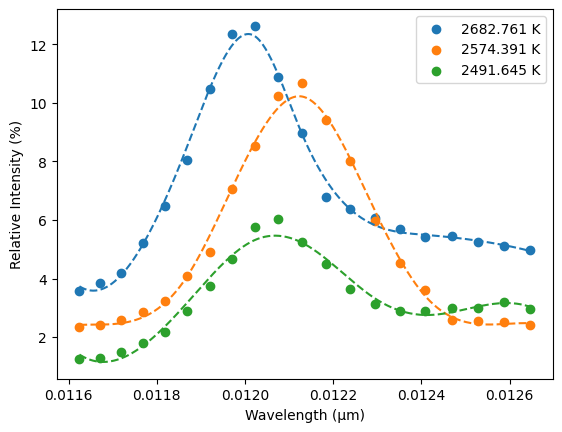

In [244]:
plt.scatter(lambda_180_comparison, intensity_180_comparison, label = '2682.761 K')
spline_180 = UnivariateSpline(lambda_180_comparison, intensity_180_comparison, s = 1)
x_180 = np.linspace(lambda_180_comparison[0], lambda_180_comparison[len(lambda_180_comparison) -1], 500)
y_180 = spline_180(x_180)
plt.plot(x_180, y_180, '--')

plt.scatter(lambda_170_comparison, intensity_170_comparison, label = '2574.391 K')
spline_170 = UnivariateSpline(lambda_170_comparison, intensity_170_comparison, s = 1)
x_170 = np.linspace(lambda_170_comparison[0], lambda_170_comparison[len(lambda_170_comparison) -1], 500)
y_170 = spline_170(x_170)
plt.plot(x_170, y_170, '--')

plt.scatter(lambda_160_comparison, intensity_160_comparison, label = '2491.645 K')
spline_160 = UnivariateSpline(lambda_160_comparison, intensity_160_comparison, s = 1)
x_160 = np.linspace(lambda_160_comparison[0], lambda_160_comparison[len(lambda_160_comparison) -1], 500)
y_160 = spline_160(x_160)
plt.plot(x_160, y_160, '--')

'''plt.scatter(lambda_180_comparison, intensity_180_comparison, label = '180V')
spline_170 = curveFit(lambda_180_comparison, intensity_180_comparison)

plt.scatter(lambda_160[25:45], intensity_160[25:45], label = '160V')
plt.plot(lambda_160[25:45], intensity_160[25:45])'''


plt.xlabel(u"Wavelength (\u03BCm)")
plt.ylabel("Relative Intensity (%)")
plt.legend()
plt.show()

In [245]:
print(temperature_array, lamba_array)

[2491.64517543 2574.39142186 2682.76066066] [1.20752430e-07 1.21300965e-07 1.20227357e-07]
